# Графы

## Связность и разреженность графов. 


![title](images/Снимок_экрана1.jpg)


## Гигантсткие компоненты


![title](images/Снимок_экрана2.jpg)


## Диаметр сложных сетей


![title](images/Снимок_экрана3.jpg)


## Устойчивость гигантской компоненты


![title](images/Снимок_экрана4.jpg)

![title](images/Снимок_экрана4_1.jpg)



## Устойчивость к атакам на хабы


![title](images/Снимок_экрана5.jpg)

![title](images/Снимок_экрана5_2.jpg)

![title](images/Снимок_экрана5_3.jpg)


## Степенной закон распределения вершин


![title](images/Снимок_экрана6.jpg)


## Задачи

### Задача 1. Рассмотрим модель случайных графов на n вершинах, в котором каждое из возможных ребер проводится независимо от всех остальных с с одной и той же вероятностью. Используя библиотеку NetworkX, сгегенрируйте граф на 1000 вершинах при р=0,003. Оцените разницу между количеством ребер и их ожидаемым количеством. Постройте график распределения вершин в log-log координатах. Оцените степенную зависимость закона распределения вершин. 

In [13]:
import networkx as nx
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 10

In [14]:
G = nx.gnp_random_graph(1000, 0.003)

In [15]:
## ваш код здесь для подсчета количества сгенерированных ребер и ожидаемого их количества
N = 1000
P = 0.003
print("количества сгенерированных ребер:", G.number_of_edges())
print("ожидаемого их количества:", N*(N-1)*P)

количества сгенерированных ребер: 1541
ожидаемого их количества: 2997.0


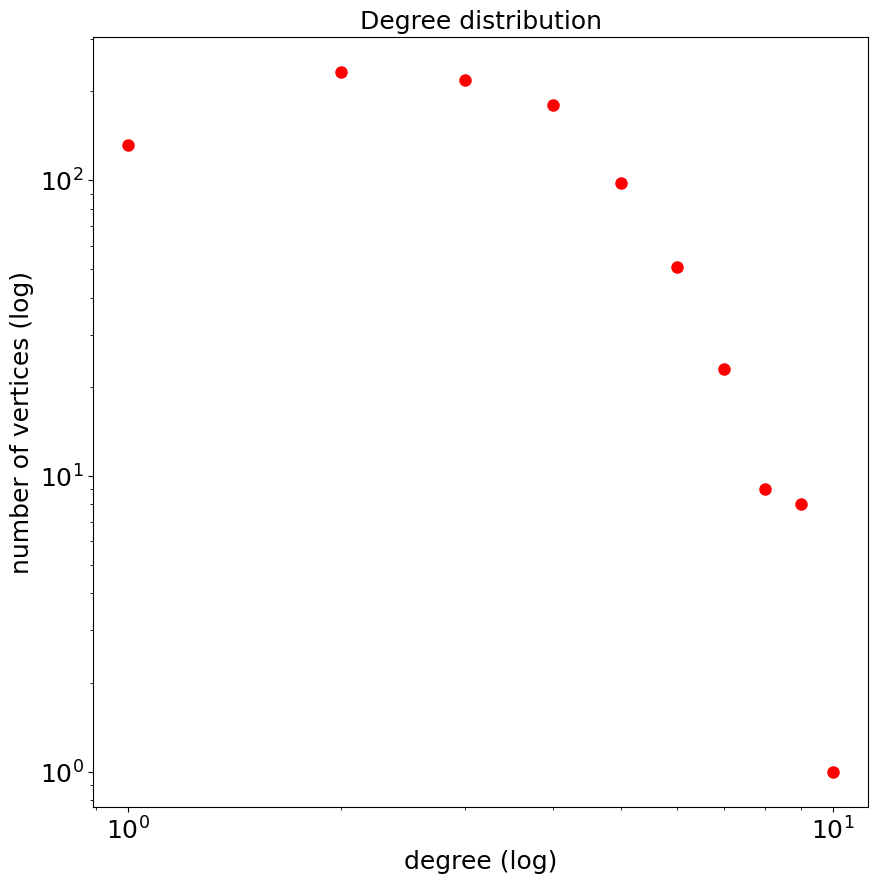

In [16]:
# подсчет количества вершин каждой степени
degrees = dict()
for degree in dict(G.degree()).values():
    if degree in degrees:
        degrees[degree] += 1
    else:
        degrees[degree] = 1
# Ваш код для формирования такого же словаря, с помощью библиотечных функций


sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)
plt.xlabel("degree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.show()

### Задача 2. Найдите число компонено связности в графе из предыдущей задачи. Есть ли в нем гигантская уомпонента? Сколько в ней вершин, каков ее диаметр? Удажите из графа 10- ую часть вершин. Остентся ли в графе гигантская компонента? Сделайте исследование при какой доле вершин гигантская компонента разрушается.

In [17]:
components = nx.number_connected_components(G)
print (components)
giant_component_list = sorted(nx.connected_components(G), key=len, reverse=True) # reverse для сортировки по убыванию
giant_component = G.subgraph(giant_component_list[0])
print (G.subgraph(giant_component))
# print(len(max(nx.connected_components(G), key=len))) # количество вершин в гигантской компоненте
print (nx.diameter(giant_component))


53
Graph with 944 nodes and 1537 edges
12


In [18]:
# Ваш код здесь для удаления 10 процентов случайных вершин
import random
print(G.number_of_nodes())
G.remove_nodes_from(random.sample(G.nodes(), int(G.number_of_nodes() * 0.1)))

1000


/var/folders/1n/t6y33_2d0b97y1zgywf26lvc0000gn/T/ipykernel_80231/1533373143.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  G.remove_nodes_from(random.sample(G.nodes(), int(G.number_of_nodes() * 0.1)))


In [23]:
# вывести количество оставшихся вершин, количество компонент связности, гигантскую компоненту связности

print("количество оставшихся вершин:", G.number_of_nodes())
print("количество компонент связности:", nx.number_connected_components(G))
print("гигантскую компоненту связности:", len(max(nx.connected_components(G), key=len)))

количество оставшихся вершин: 850
количество компонент связности: 73
гигантскую компоненту связности: 769


### Задача 3. Найдите число компонено связности в графе из предыдущей задачи. Есть ли в нем гигантская уомпонента? Сколько в ней вершин, каков ее диаметр? Удажите из графа 50 самых больших по степени вершин. Остентся ли в графе гигантская компонента? Сделайте исследование при какой доле вершин гигантская компонента разрушается.

In [20]:
# Ваш код здесь для удаления 50 вершин-хабов
G.remove_nodes_from(
    sorted(
        G.nodes(), 
        key=lambda x: G.number_of_edges(x)
    )[:50]
)

In [22]:
# вывести количество оставшихся вершин, количество компонент связности, гигантскую компоненту связности
# вывести количество оставшихся вершин, количество компонент связности, гигантскую компоненту связности

print("количество оставшихся вершин:", G.number_of_nodes())
print("количество компонент связности:", nx.number_connected_components(G))
print("гигантскую компоненту связности:", len(max(nx.connected_components(G), key=len)))

количество оставшихся вершин: 850
количество компонент связности: 73
гигантскую компоненту связности: 769
